In [1]:
from Model3 import RiverDeltaModel
import matplotlib.pyplot as plt
import networkx as nx
import warnings 
import copy
import matplotlib.lines as mlines

c:\Users\sjuul\anaconda3\envs\afstuderen2025\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data

,Average_Livelihood,Num_household_members,Migrated_households,Migrated_members,Migrated_individuals,Died agents,Child births
0,0.000000,1000,0,0,0,0,0
1,0.000000,1000,0,0,0,0,0
2,0.000000,986,3,14,0,0,0
3,0.000000,986,3,14,0,0,0
4,0.000000,964,11,35,1,0,0
...,...,...,...,...,...,...,...
69,0.124519,626,118,389,49,89,152
70,0.121472,610,121,402,51,95,157
71,0.127964,611,124,407,51,101,169
72,0.126285,604,124,407,53,110,173


In [4]:
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data

Crop_type Land_category  Savings  too low income
Step AgentID                                                 
1    1            None          None      NaN             NaN
     2            None          None      NaN             NaN
     3            None          None      NaN             NaN
     4            None          None      NaN             NaN
     5            None          None      NaN             NaN
...                ...           ...      ...             ...
300  3198         None          None      NaN             NaN
     3199         None          None      NaN             NaN
     3200         None          None      NaN             NaN
     3201         None          None      NaN             NaN
     3202         None          None      NaN             NaN

[90693 rows x 4 columns]

In [5]:
# normal_salinity = agent_data

In [6]:
# salinity_low = agent_data

In [8]:
salinity_high = agent_data

In [6]:
import pandas as pd

def run_scenario(scenario_name, salinity_low, salinity_high, n_runs=10):
    results = []

    for seed in range(n_runs):
        model = RiverDeltaModel(seed=seed, salinity_low=salinity_low,salinity_high = salinity_high )  # ← pas dit aan voor jouw modelinit
        for _ in range(300):
            model.step()
        
        agent_data = model.datacollector.get_agent_vars_dataframe().reset_index()
        step300 = agent_data[agent_data["Step"] == 300]
        crop_counts = step300["Crop_type"].value_counts()

        results.append({
            "Scenario": scenario_name,
            "Seed": seed,
            "Rice": crop_counts.get("Rice", 0),
            "Annual crops": crop_counts.get("Annual crops", 0),
            "Perennial crops": crop_counts.get("Perennial crops", 0),
            "Aquaculture": crop_counts.get("Aquaculture", 0),
        })

    return pd.DataFrame(results)

df_a = run_scenario("Low salinity", salinity_low=True, salinity_high = False)
df_b = run_scenario("Medium salinity", salinity_low = False,  salinity_high = False)
df_c = run_scenario("High salinity", salinity_low=False, salinity_high = True)

# Combineer alle data
all_results = pd.concat([df_a, df_b, df_c], ignore_index=True)

There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
shock is happening!!
neighbor is rijk en neemt land over
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
shock is happening!!
neighbor is rijk en neemt land over
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!


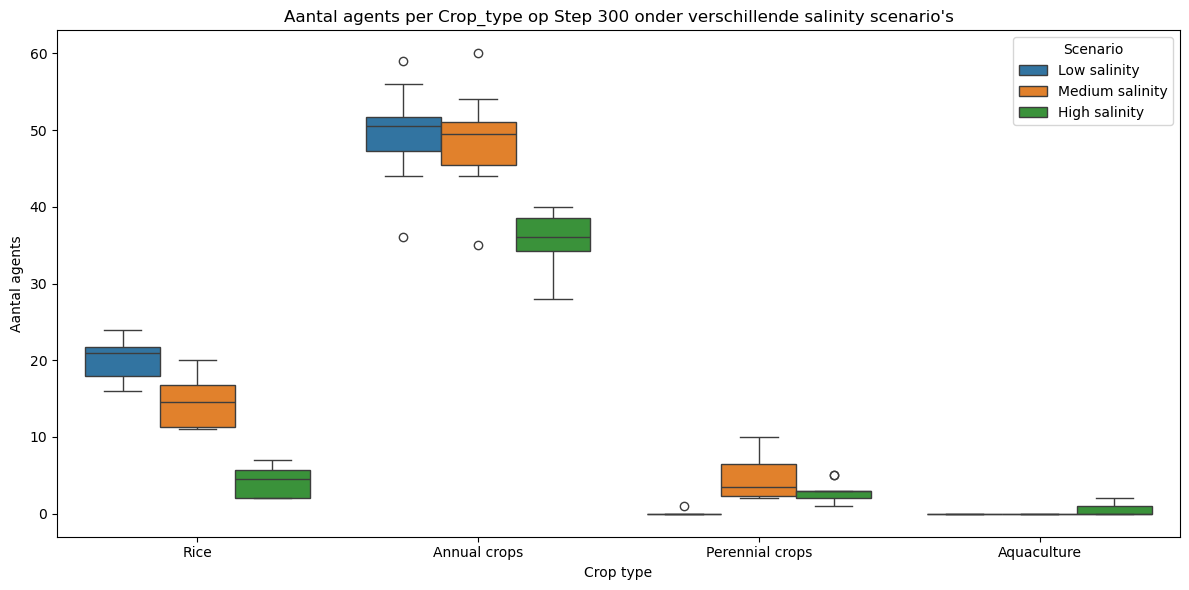

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Zet data in long format voor seaborn
df_long = all_results.melt(id_vars=["Scenario", "Seed"], 
                           value_vars=["Rice", "Annual crops", "Perennial crops", "Aquaculture"],
                           var_name="Crop_type", value_name="Count")

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_long, x="Crop_type", y="Count", hue="Scenario")
plt.title("Aantal agents per Crop_type op Step 300 onder verschillende salinity scenario's")
plt.ylabel("Aantal agents")
plt.xlabel("Crop type")
plt.legend(title="Scenario")
plt.tight_layout()
plt.show()


In [12]:
def run_scenario_full(scenario_name, salinity_low, salinity_high, n_runs=10):
    results = []

    for seed in range(n_runs):
        model = RiverDeltaModel(seed=seed, salinity_low=salinity_low, salinity_high=salinity_high)

        for _ in range(300):
            model.step()

        # Agent data
        agent_data = model.datacollector.get_agent_vars_dataframe().reset_index()
        step300_agents = agent_data[agent_data["Step"] == 300]
        crop_counts = step300_agents["Crop_type"].value_counts()

        # Model data
        model_data = model.datacollector.get_model_vars_dataframe()
        model_data["Step"] = model_data.index  # ← FIX HIER
        step300_model = model_data[model_data["Step"] == 300]

        if not step300_model.empty:
            model_row = step300_model.iloc[0]
        else:
            model_row = {}

        results.append({
            "Scenario": scenario_name,
            "Seed": seed,
            # Agent-level info
            "Rice": crop_counts.get("Rice", 0),
            "Annual crops": crop_counts.get("Annual crops", 0),
            "Perennial crops": crop_counts.get("Perennial crops", 0),
            "Aquaculture": crop_counts.get("Aquaculture", 0),
            # Model-level info
            "Migrated_households": model_row.get("Migrated_households", None),
            "Died agents": model_row.get("Died agents", None),
            "Child births": model_row.get("Child births", None),
            "Average_Livelihood": model_row.get("Average_Livelihood", None),
        })

    return pd.DataFrame(results)


In [13]:
df_low = run_scenario_full("Low salinity", salinity_low=True, salinity_high=False)
df_medium = run_scenario_full("Medium salinity", salinity_low=False, salinity_high=False)
df_high = run_scenario_full("High salinity", salinity_low=False, salinity_high=True)

all_full = pd.concat([df_low, df_medium, df_high], ignore_index=True)


There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
shock is happening!!
neighbor is rijk en neemt land over
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
shock is happening!!
neighbor is rijk en neemt land over
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


shock is happening!!
shock is happening!!
There are 0 agents unassigned!!


c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:1126: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  candidate_points = districts_polygon.sample_points(size=len(land_agents)*50, seed=seed)


neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
neighbor is rijk en neemt land over
shock is happening!!
shock is happening!!


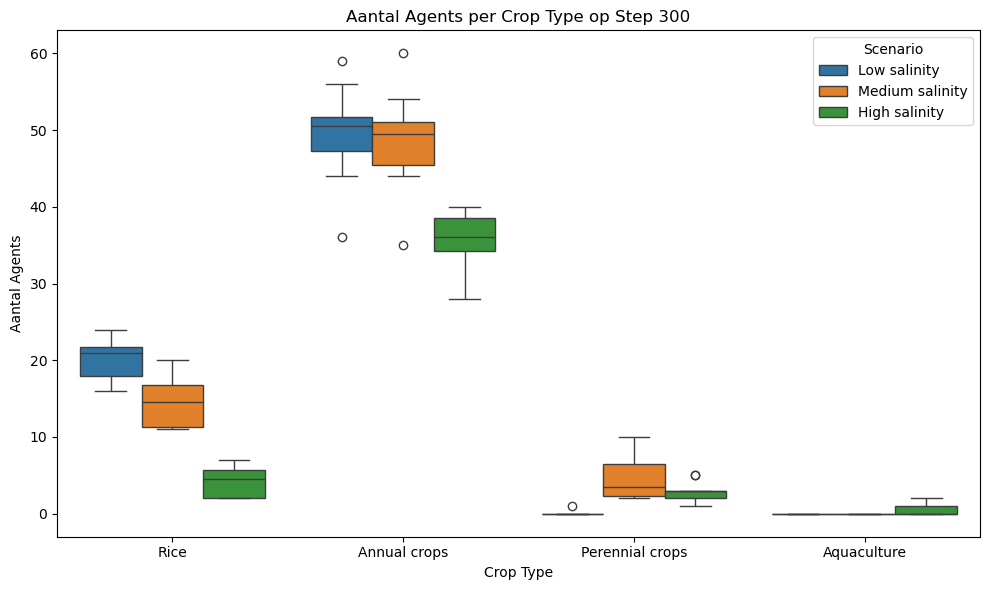

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Zet crop counts in long format voor eenvoudige boxplots
crop_long =all_full.melt(
    id_vars=["Scenario"],
    value_vars=["Rice", "Annual crops", "Perennial crops", "Aquaculture"],
    var_name="Crop Type",
    value_name="Count"
)

plt.figure(figsize=(10, 6))
sns.boxplot(data=crop_long, x="Crop Type", y="Count", hue="Scenario")
plt.title("Aantal Agents per Crop Type op Step 300")
plt.ylabel("Aantal Agents")
plt.xlabel("Crop Type")
plt.legend(title="Scenario")
plt.tight_layout()
plt.show()


In [18]:
all_full


,Scenario,Seed,Rice,Annual crops,Perennial crops,Aquaculture,Migrated_households,Died agents,Child births,Average_Livelihood
0,Low salinity,0,16,52,0,0,None,None,None,None
1,Low salinity,1,21,36,0,0,None,None,None,None
2,Low salinity,2,23,51,0,0,None,None,None,None
3,Low salinity,3,24,48,0,0,None,None,None,None
4,Low salinity,4,22,50,1,0,None,None,None,None
5,Low salinity,5,18,59,0,0,None,None,None,None
6,Low salinity,6,21,56,0,0,None,None,None,None
7,Low salinity,7,18,44,0,0,None,None,None,None
8,Low salinity,8,21,47,0,0,None,None,None,None
9,Low salinity,9,17,51,0,0,None,None,None,None
